# **Project 1** Customer Service Requests Analysis #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import data into Python environment ####

In [2]:
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


##### Shape of the Dataset #####

In [4]:
df.shape

(9748, 53)

##### Check for null values #####

In [5]:
df.isna().sum(axis = 0)

Unique Key                           0
Created Date                         0
Closed Date                         56
Agency                               0
Agency Name                          0
Complaint Type                       0
Descriptor                         174
Location Type                        0
Incident Zip                        65
Incident Address                  1090
Street Name                       1090
Cross Street 1                    1226
Cross Street 2                    1242
Intersection Street 1             8663
Intersection Street 2             8677
Address Type                        71
City                                65
Landmark                          9743
Facility Type                       54
Status                               0
Due Date                             0
Resolution Description               0
Resolution Action Updated Date      55
Community Board                      1
Borough                              1
X Coordinate (State Plane

- ##### This data has a lot of null values

In [6]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

##### Dropping columns with large number of missing values and unnecesary columns

In [7]:
drop_columns = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2',
                'Intersection Street 1','Intersection Street 2','Address Type','Park Facility Name',
                'Park Borough','School Name','School Number','School Region','School Code',
                'School Phone Number','School Address','School City','School State','School Zip',
                'School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough',
                'Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp',
                'Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
                'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date',
                'Resolution Action Updated Date','Community Board','Facility Type','Location']
df = df.drop(drop_columns, axis =1)

In [8]:
df.isna().sum(axis = 0)  # Checking for null values

Unique Key                  0
Created Date                0
Closed Date                56
Agency                      0
Complaint Type              0
Descriptor                174
Location Type               0
Incident Zip               65
City                       65
Status                      0
Resolution Description      0
Borough                     1
Latitude                   85
Longitude                  85
dtype: int64

In [9]:
df.shape

(9748, 14)

##### We have to delete null values of only closed cases 

In [10]:
df = df[df['Status'] == 'Closed']

In [11]:
df.isna().sum()

Unique Key                  0
Created Date                0
Closed Date                 0
Agency                      0
Complaint Type              0
Descriptor                174
Location Type               0
Incident Zip               12
City                       12
Status                      0
Resolution Description      0
Borough                     1
Latitude                   32
Longitude                  32
dtype: int64

In [12]:
# since all the cases are of closed cases we can now drop the column Status as every value of its data are same
df = df.drop(['Status'], axis = 1)

In [13]:
df.shape

(9692, 13)

In [14]:
df.isna().sum()/df.shape[0]*100

Unique Key                0.000000
Created Date              0.000000
Closed Date               0.000000
Agency                    0.000000
Complaint Type            0.000000
Descriptor                1.795295
Location Type             0.000000
Incident Zip              0.123813
City                      0.123813
Resolution Description    0.000000
Borough                   0.010318
Latitude                  0.330169
Longitude                 0.330169
dtype: float64

In [15]:
df = df[(df['Descriptor'].notnull()) & (df['Latitude'].notnull()) &(df['Longitude'].notnull())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9487 entries, 0 to 9746
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unique Key              9487 non-null   int64  
 1   Created Date            9487 non-null   object 
 2   Closed Date             9487 non-null   object 
 3   Agency                  9487 non-null   object 
 4   Complaint Type          9487 non-null   object 
 5   Descriptor              9487 non-null   object 
 6   Location Type           9487 non-null   object 
 7   Incident Zip            9487 non-null   float64
 8   City                    9487 non-null   object 
 9   Resolution Description  9487 non-null   object 
 10  Borough                 9487 non-null   object 
 11  Latitude                9487 non-null   float64
 12  Longitude               9487 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


- ##### The Dataset has no null value now

In [16]:
cols = ['Created Date', 'Closed Date']
for col in cols:
    df[col] = pd.to_datetime(df[col],infer_datetime_format=True)
df.isna().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

In [17]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


- ##### There is no date with incorrect format

##### Frequency plot for city-wise complaints

In [18]:
df['Complaint Type'].value_counts()

Blocked Driveway            3243
Illegal Parking             2746
Noise - Commercial          1053
Noise - Street/Sidewalk      815
Derelict Vehicle             619
Noise - Vehicle              379
Animal Abuse                 240
Vending                      136
Traffic                      106
Posting Advertisement         57
Drinking                      40
Noise - Park                  32
Noise - House of Worship      16
Graffiti                       3
Disorderly Youth               2
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Complaint Types'}, ylabel='Count'>

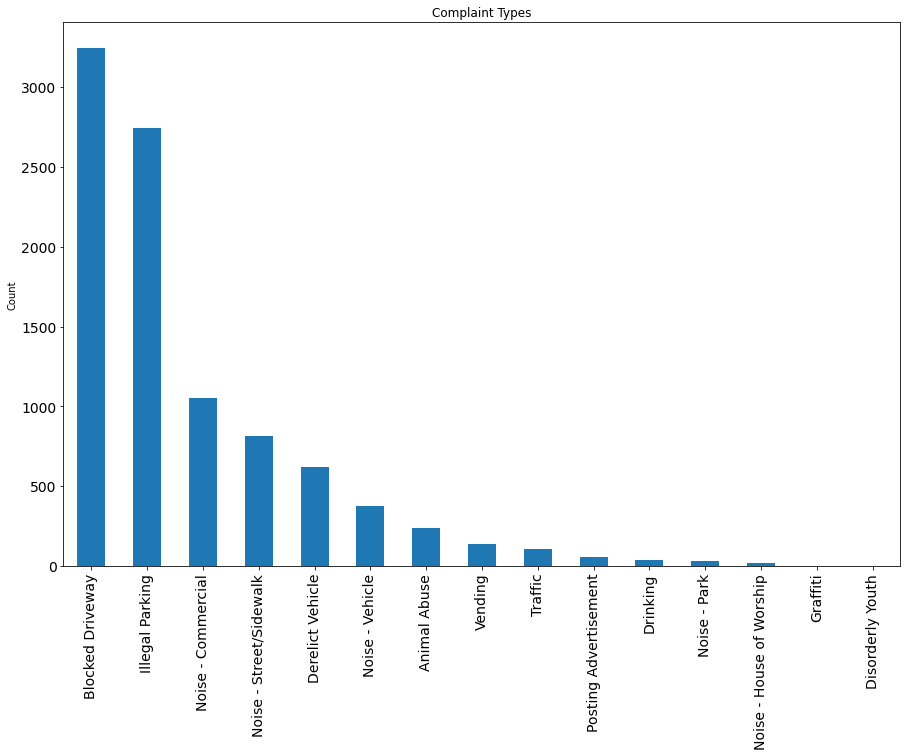

In [19]:
df['Complaint Type'].value_counts().plot(kind = 'bar', figsize=(15, 10), title='Complaint Types', 
                                         ylabel='Count', fontsize = 14)

#### Let's see how does Brooklyn look like

In [20]:
df_Brooklyn = df[df['Borough']=='BROOKLYN']

- ##### Scatter 

(-74.04848387076728, -73.8485532533988, 40.564853552700846, 40.74632234018324)

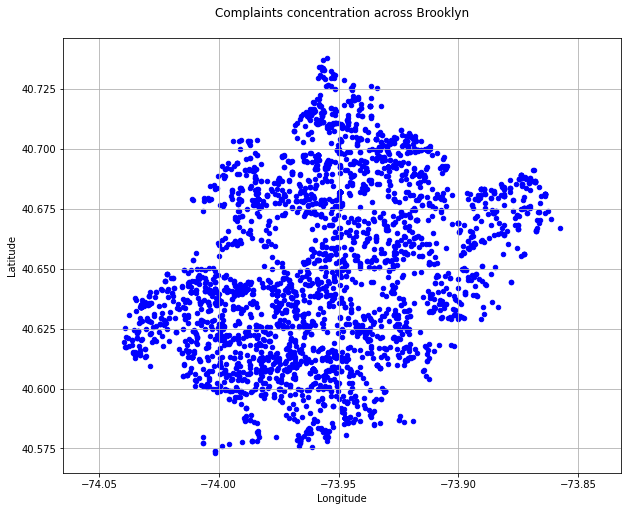

In [21]:
df_Brooklyn[['Longitude', 'Latitude']].plot(kind='scatter', 
                                            x='Longitude', y='Latitude', c='blue', figsize=(10,8),
                                            title = 'Complaints concentration across Brooklyn\n',
                                            grid = True).axis('equal')

- ##### Hexbin

(-74.04848387096722, -73.84855325319887, 40.564853552700846, 40.74632234018324)

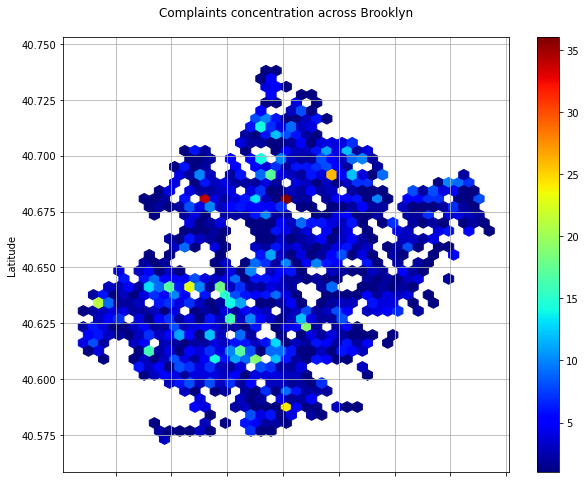

In [22]:
df_Brooklyn[['Longitude', 'Latitude']].plot(kind='hexbin', 
                                            x='Longitude', y='Latitude', figsize=(10,8), gridsize = 40,
                                            colormap = 'jet', mincnt=1,
                                            title = 'Complaints concentration across Brooklyn\n',
                                            grid = True).axis('equal')

##### Plotting a bar graph of count vs. complaint types

In [23]:
import seaborn as sns # importing seaborn library

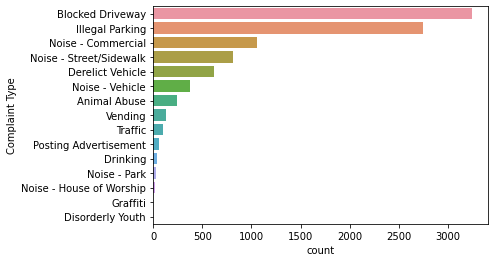

In [24]:
sns.countplot(y = 'Complaint Type', data = df,order = df['Complaint Type'].value_counts().index)
plt.show()

In [25]:
complaint_type = df["Complaint Type"].value_counts()[0:10]
complaint_type = complaint_type.to_frame()
complaint_type = complaint_type.rename(columns={'Complaint Type':'Counts'})
complaint_type

,Counts
Blocked Driveway,3243
Illegal Parking,2746
Noise - Commercial,1053
Noise - Street/Sidewalk,815
Derelict Vehicle,619
Noise - Vehicle,379
Animal Abuse,240
Vending,136
Traffic,106
Posting Advertisement,57


- ##### 10 most common complaint types

In [26]:
df_city = df.groupby(by = ["City","Complaint Type"]).size().sort_values(ascending = False)
df_city = pd.DataFrame(df_city)
df_city.head(30)

0
City                Complaint Type               
BROOKLYN            Blocked Driveway         1146
                    Illegal Parking          1030
BRONX               Blocked Driveway          583
NEW YORK            Noise - Commercial        423
                    Illegal Parking           377
                    Noise - Street/Sidewalk   369
BROOKLYN            Noise - Commercial        327
BRONX               Illegal Parking           283
BROOKLYN            Derelict Vehicle          226
                    Noise - Street/Sidewalk   214
STATEN ISLAND       Illegal Parking           167
NEW YORK            Noise - Vehicle           141
JAMAICA             Blocked Driveway          137
BRONX               Noise - Street/Sidewalk   135
FLUSHING            Blocked Driveway          135
CORONA              Blocked Driveway          133
RIDGEWOOD           Illegal Parking           131
BROOKLYN            Noise - Vehicle           118
BRONX               Noise - Commercial        117
NEW YORK            Vending                   104
ASTORIA             Blocked Driveway           99
STATEN ISLAND       Blocked Driveway           92
ELMHURST            Blocked Driveway           77
FRESH MEADOWS       Illegal Parking            75
FLUSHING            Illegal Parking            75
RIDGEWOOD           Blocked Driveway           73
BRONX               Derelict Vehicle           72
SOUTH RICHMOND HILL Blocked Driveway           67
STATEN ISLAND       Derelict Vehicle           64
WOODSIDE            Blocked Driveway           59

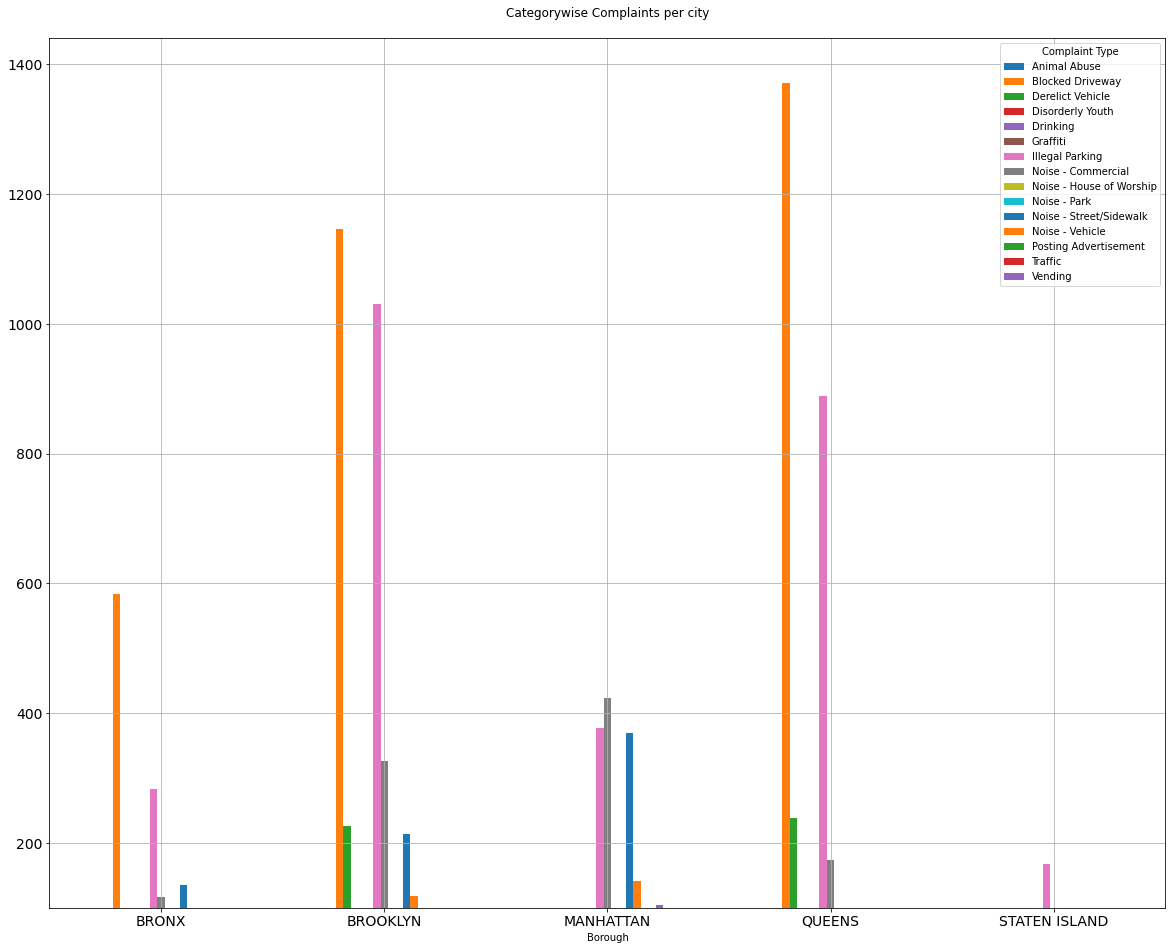

In [27]:
city_complaint_types=pd.crosstab(index=df['Borough'],columns=df['Complaint Type'])
city_complaint_types.plot(kind='bar',stacked=False,figsize=(20,16),ylim = 100, grid = True, rot = 0, 
                          fontsize = 14)
plt.title('Categorywise Complaints per city\n')
plt.show()

- ##### Major types of complaints in each city *(more than 100 complaints)*

In [28]:
df['Response Time(in seconds)'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()

In [29]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude,Response Time(in seconds)
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,12464.0


In [30]:
df.shape

(9487, 14)

##### Checking Average Response Time for each complain

In [31]:
ct = list(np.unique(df['Complaint Type']))
ct

['Animal Abuse',
 'Blocked Driveway',
 'Derelict Vehicle',
 'Disorderly Youth',
 'Drinking',
 'Graffiti',
 'Illegal Parking',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Noise - Park',
 'Noise - Street/Sidewalk',
 'Noise - Vehicle',
 'Posting Advertisement',
 'Traffic',
 'Vending']

In [32]:
lst = []
dft = df[['Complaint Type', 'Response Time(in seconds)']]
for i in ct:
    df1 = dft[dft['Complaint Type'] == i]
    lst.append(df1['Response Time(in seconds)'].mean())

In [33]:
lst

[19399.975,
 17585.50354609929,
 23841.19547657512,
 2659.0,
 23259.475,
 14967.666666666666,
 15266.384195193008,
 11670.627730294396,
 4994.3125,
 19496.65625,
 12987.86380368098,
 14029.646437994723,
 5169.80701754386,
 14786.971698113208,
 10961.816176470587]

In [34]:
average_response_time= pd.Series(data=lst , index=ct)
average_response_time

Animal Abuse                19399.975000
Blocked Driveway            17585.503546
Derelict Vehicle            23841.195477
Disorderly Youth             2659.000000
Drinking                    23259.475000
Graffiti                    14967.666667
Illegal Parking             15266.384195
Noise - Commercial          11670.627730
Noise - House of Worship     4994.312500
Noise - Park                19496.656250
Noise - Street/Sidewalk     12987.863804
Noise - Vehicle             14029.646438
Posting Advertisement        5169.807018
Traffic                     14786.971698
Vending                     10961.816176
dtype: float64

In [44]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [45]:
complaintTypes = df['Complaint Type'].unique()

for i in range(len(complaintTypes)):
    exec("c{} = df.loc[(df['Complaint Type'] == '{}'),'Response Time(in seconds)']".
         format(i+1,complaintTypes[i]))

In [57]:
fscore,pvalue = stats.f_oneway(c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15)
print(fscore, pvalue)

13.29706716981968 8.013166961144925e-32
